In [199]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# import maxNLocator
from matplotlib.ticker import MaxNLocator

In [200]:
# load data from csv files
df_GainFrame = pd.read_csv('Decision Making F1.csv')
# drop the first column and fourth columns
df_GainFrame = df_GainFrame.drop(df_GainFrame.columns[[0,3]], axis=1)

# print(df_GainFrame.head()) # print first 5 rows of the dataframe for debugging
# print(df_GainFrame.shape) # print the number of rows and columns

df_LossFrame = pd.read_csv('Decision Making F2.csv')
# drop the first column and fourth columns
df_LossFrame = df_LossFrame.drop(df_LossFrame.columns[[0,3]], axis=1)

# print(df_LossFrame.head()) # print first 5 rows of the dataframe for debugging
# print(df_LossFrame.shape) # print the number of rows and columns

In [201]:
# Data preprocessing
# Replace "Image-1" with "Keep" and "Image-2" with "Gamble" in the last 16 columns of df_GainFrame

df_GainFrame = df_GainFrame.replace(to_replace = 'Image-1', value = 'Keep')
df_GainFrame = df_GainFrame.replace(to_replace = 'Image-2', value = 'Gamble')

# Replace "Image-1" with "Loss" and "Image-2" with "Gamble" in the last 16 columns of df_LossFrame

df_LossFrame = df_LossFrame.replace(to_replace = 'Image-1', value = 'Loss')
df_LossFrame = df_LossFrame.replace(to_replace = 'Image-2', value = 'Gamble')

# print(df_GainFrame) # print first 5 rows of the dataframe for debugging
# print(df_GainFrame.shape) # print the number of rows and columns

# print(df_LossFrame.head()) # print first 5 rows of the dataframe for debugging
# print(df_LossFrame.shape) # print the number of rows and columns

# save the dataframes to csv files for debugging
df_GainFrame.to_csv('GainFrame.csv', index=False)
df_LossFrame.to_csv('LossFrame.csv', index=False)

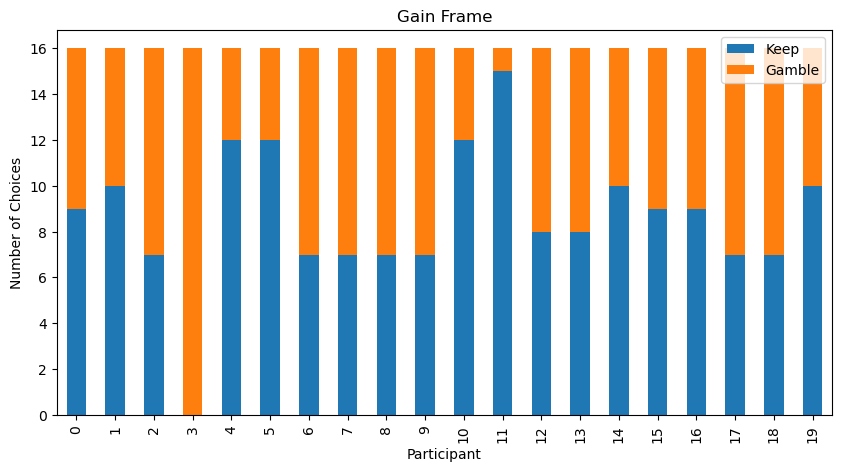

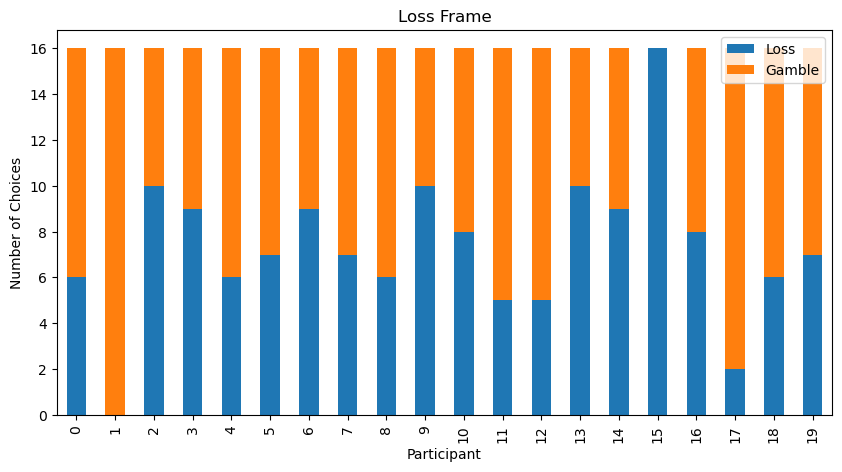

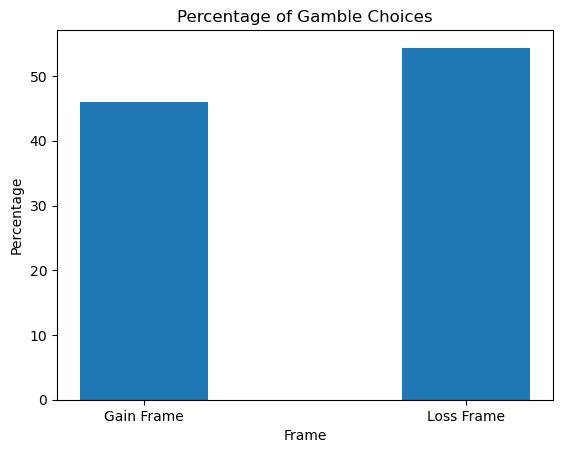

Percentage of Gamble Choices in Gain Frame:  45.9375
Percentage of Gamble Choices in Loss Frame:  54.37499999999999


In [202]:
# Data Analysis and Visualization


# Count the number of "Keep" and "Gamble" in the last 16 columns in each row of df_GainFrame
df_GainFrame['Keep'] = df_GainFrame.iloc[:, 3:19].eq('Keep').sum(axis=1)
df_GainFrame['Gamble'] = df_GainFrame.iloc[:, 3:19].eq('Gamble').sum(axis=1)

# print "Keep" and "Gamble" columns of df_GainFrame
# print(df_GainFrame[['Keep', 'Gamble']])

# Count the number of "Loss" and "Gamble" in the last 16 columns in each row of df_LossFrame
df_LossFrame['Loss'] = df_LossFrame.iloc[:, 3:19].eq('Loss').sum(axis=1)
df_LossFrame['Gamble'] = df_LossFrame.iloc[:, 3:19].eq('Gamble').sum(axis=1)

# print "Loss" and "Gamble" columns of df_LossFrame
# print(df_LossFrame[['Loss', 'Gamble']])

# save the dataframes to csv files for debugging, delete the files if they already exist
if os.path.exists('GainFrame.csv'):
    os.remove('GainFrame.csv')
if os.path.exists('LossFrame.csv'):
    os.remove('LossFrame.csv')

df_GainFrame.to_csv('GainFrame.csv', index=False)
df_LossFrame.to_csv('LossFrame.csv', index=False)

# Plot as a bar chart the "Keep" and "Gamble" columns of df_GainFrame
df_GainFrame[['Keep', 'Gamble']].plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Gain Frame')
plt.xlabel('Participant')
plt.ylabel('Number of Choices')
plt.show()


# Plot as a bar chart the "Loss" and "Gamble" columns of df_LossFrame
df_LossFrame[['Loss', 'Gamble']].plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Loss Frame')
plt.xlabel('Participant')
plt.ylabel('Number of Choices')
plt.show()

# Total number of "Gamble" choices in df_GainFrame
total_Gamble_GainFrame = df_GainFrame['Gamble'].sum()

# Total number of "Gamble" choices in df_LossFrame
total_Gamble_LossFrame = df_LossFrame['Gamble'].sum()

# Total number of "Keep" choices in df_GainFrame
total_Keep_GainFrame = df_GainFrame['Keep'].sum()

# Total number of "Loss" choices in df_LossFrame
total_Loss_LossFrame = df_LossFrame['Loss'].sum()

# Percentage of "Gamble" choices in df_GainFrame
percentage_Gamble_GainFrame = (total_Gamble_GainFrame / (total_Gamble_GainFrame + total_Keep_GainFrame)) * 100

# Percentage of "Gamble" choices in df_LossFrame
percentage_Gamble_LossFrame = (total_Gamble_LossFrame / (total_Gamble_LossFrame + total_Loss_LossFrame)) * 100

# plot the above percentages as a bar chart
# make the thickness of the bars thinner
# make the gap between the bars smaller
plt.bar(['Gain Frame', 'Loss Frame'], [percentage_Gamble_GainFrame, percentage_Gamble_LossFrame], width=0.4)
# plt.ylim(0, 100)
plt.title('Percentage of Gamble Choices')
plt.xlabel('Frame')
plt.ylabel('Percentage')
plt.show()

# print the above percentages
print('Percentage of Gamble Choices in Gain Frame: ', percentage_Gamble_GainFrame)
print('Percentage of Gamble Choices in Loss Frame: ', percentage_Gamble_LossFrame)

In [203]:
# For each and every column in the last 16 columns, count the number of "Keep" and "Gamble" choices in df_GainFrame 
# Create a new dataframe with the columns as the last 16 columns, and the rows as "Keep" and "Gamble"

df_GainFrame_Keep_Gamble = pd.DataFrame(columns=df_GainFrame.columns[3:19])
df_GainFrame_Keep_Gamble.loc['Keep'] = df_GainFrame.iloc[:, 3:19].eq('Keep').sum(axis=0)
df_GainFrame_Keep_Gamble.loc['Gamble'] = df_GainFrame.iloc[:, 3:19].eq('Gamble').sum(axis=0)

# print(df_GainFrame_Keep_Gamble)
# save the dataframe to csv file for debugging, delete the file if it already exists
if os.path.exists('GainFrame_Keep_Gamble.csv'):
    os.remove('GainFrame_Keep_Gamble.csv')
df_GainFrame_Keep_Gamble.to_csv('GainFrame_Keep_Gamble.csv', index=True)

# For each and every column in the last 16 columns, count the number of "Loss" and "Gamble" choices in df_LossFrame
# Create a new dataframe with the columns as the last 16 columns, and the rows as "Loss" and "Gamble"

df_LossFrame_Loss_Gamble = pd.DataFrame(columns=df_LossFrame.columns[3:19])
df_LossFrame_Loss_Gamble.loc['Loss'] = df_LossFrame.iloc[:, 3:19].eq('Loss').sum(axis=0)
df_LossFrame_Loss_Gamble.loc['Gamble'] = df_LossFrame.iloc[:, 3:19].eq('Gamble').sum(axis=0)

# print(df_LossFrame_Loss_Gamble)
# save the dataframe to csv file for debugging, delete the file if it already exists
if os.path.exists('LossFrame_Loss_Gamble.csv'):
    os.remove('LossFrame_Loss_Gamble.csv')
df_LossFrame_Loss_Gamble.to_csv('LossFrame_Loss_Gamble.csv', index=True)


In [204]:
# Rename the column names of df_GainFrame_Keep_Gamble as follows : first four columns as "100, 20%", "100, 40%", "100, 60%", "100, 80%" 
# next four columns as "500, 20%", "500, 40%", "500, 60%", "500, 80%"
# next four columns as "1000, 20%", "1000, 40%", "1000, 60%", "1000, 80%"
# next four columns as "2000, 20%", "2000, 40%", "2000, 60%", "2000, 80%"

df_GainFrame_Keep_Gamble.columns = ['100, 20%', '100, 40%', '100, 60%', '100, 80%', '500, 20%', '500, 40%', '500, 60%', '500, 80%', '1000, 20%', '1000, 40%', '1000, 60%', '1000, 80%', '2000, 20%', '2000, 40%', '2000, 60%', '2000, 80%']

# Rename the column names of df_LossFrame_Loss_Gamble as follows : first four columns as "100, 80%", "100, 60%", "100, 40%", "100, 20%"
# next four columns as "500, 80%", "500, 60%", "500, 40%", "500, 20%"
# next four columns as "1000, 80%", "1000, 60%", "1000, 40%", "1000, 20%"
# next four columns as "2000, 80%", "2000, 60%", "2000, 40%", "2000, 20%"

df_LossFrame_Loss_Gamble.columns = ['100, 80%', '100, 60%', '100, 40%', '100, 20%', '500, 80%', '500, 60%', '500, 40%', '500, 20%', '1000, 80%', '1000, 60%', '1000, 40%', '1000, 20%', '2000, 80%', '2000, 60%', '2000, 40%', '2000, 20%']

# print(df_GainFrame_Keep_Gamble)
# print(df_LossFrame_Loss_Gamble)

# print(df_GainFrame_Keep_Gamble)
# save the dataframe to csv file for debugging, delete the file if it already exists
if os.path.exists('GainFrame_Keep_Gamble.csv'):
    os.remove('GainFrame_Keep_Gamble.csv')
df_GainFrame_Keep_Gamble.to_csv('GainFrame_Keep_Gamble.csv', index=True)

# print(df_LossFrame_Loss_Gamble)
# save the dataframe to csv file for debugging, delete the file if it already exists
if os.path.exists('LossFrame_Loss_Gamble.csv'):
    os.remove('LossFrame_Loss_Gamble.csv')
df_LossFrame_Loss_Gamble.to_csv('LossFrame_Loss_Gamble.csv', index=True)


In [205]:
# Exchange the rows and columns of df_GainFrame_Keep_Gamble and df_LossFrame_Loss_Gamble

df_GainFrame_Keep_Gamble = df_GainFrame_Keep_Gamble.transpose()
df_LossFrame_Loss_Gamble = df_LossFrame_Loss_Gamble.transpose()

print(df_GainFrame_Keep_Gamble)
# print(df_LossFrame_Loss_Gamble)



           Keep  Gamble
100, 20%      0      20
100, 40%      3      17
100, 60%     11       9
100, 80%     18       2
500, 20%      5      15
500, 40%      7      13
500, 60%     18       2
500, 80%     19       1
1000, 20%     4      16
1000, 40%     8      12
1000, 60%    14       6
1000, 80%    19       1
2000, 20%     3      17
2000, 40%     7      13
2000, 60%    18       2
2000, 80%    19       1


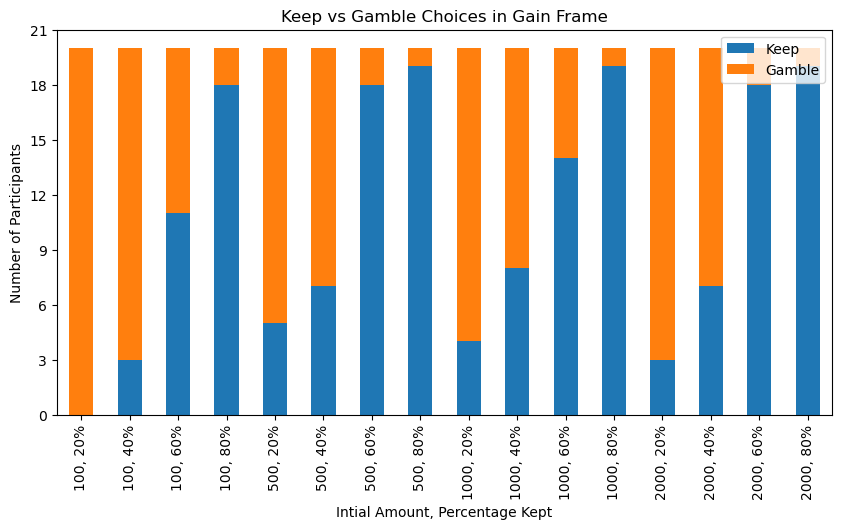

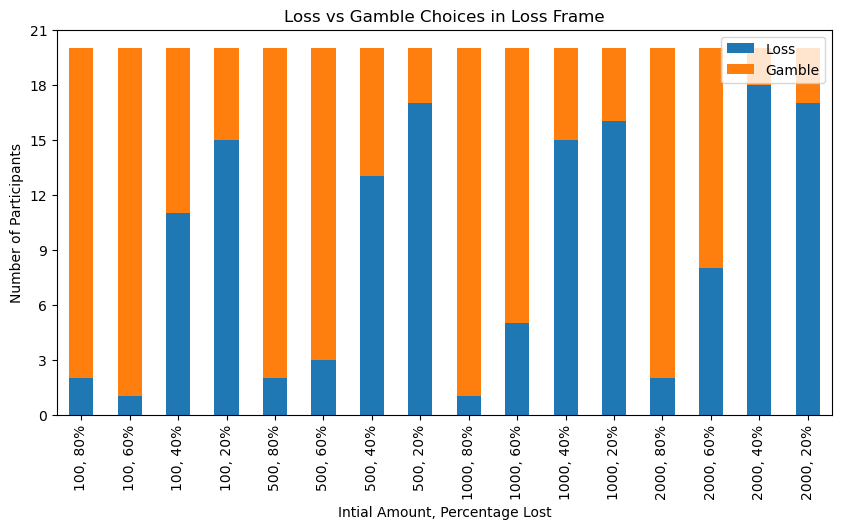

In [206]:
# Plot the bar graph for df_GainFrame_Keep_Gamble

df_GainFrame_Keep_Gamble.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Keep vs Gamble Choices in Gain Frame')
plt.xlabel('Intial Amount, Percentage Kept')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Number of Participants')
plt.legend(loc='upper right')
plt.show()

# Plot the bar graph for df_LossFrame_Loss_Gamble

df_LossFrame_Loss_Gamble.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Loss vs Gamble Choices in Loss Frame')
plt.xlabel('Intial Amount, Percentage Lost')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Number of Participants')
plt.legend(loc='upper right')
plt.show()

In [207]:
df_LossFrame_Loss_Gamble = df_LossFrame_Loss_Gamble.transpose()
df_GainFrame_Keep_Gamble = df_GainFrame_Keep_Gamble.transpose()

# Rename the columns of df_LossFrame_Loss_Gamble as follows : first four columns as "100, 20%", "100, 40%", "100, 60%", "100, 80%"
# next four columns as "500, 20%", "500, 40%", "500, 60%", "500, 80%"
# next four columns as "1000, 20%", "1000, 40%", "1000, 60%", "1000, 80%"
# next four columns as "2000, 20%", "2000, 40%", "2000, 60%", "2000, 80%"

df_LossFrame_Loss_Gamble.columns = ['100, 20%', '100, 40%', '100, 60%', '100, 80%', '500, 20%', '500, 40%', '500, 60%', '500, 80%', '1000, 20%', '1000, 40%', '1000, 60%', '1000, 80%', '2000, 20%', '2000, 40%', '2000, 60%', '2000, 80%']

print(df_LossFrame_Loss_Gamble)
print(df_GainFrame_Keep_Gamble)

        100, 20%  100, 40%  100, 60%  100, 80%  500, 20%  500, 40%  500, 60%  \
Loss           2         1        11        15         2         3        13   
Gamble        18        19         9         5        18        17         7   

        500, 80%  1000, 20%  1000, 40%  1000, 60%  1000, 80%  2000, 20%  \
Loss          17          1          5         15         16          2   
Gamble         3         19         15          5          4         18   

        2000, 40%  2000, 60%  2000, 80%  
Loss            8         18         17  
Gamble         12          2          3  
        100, 20%  100, 40%  100, 60%  100, 80%  500, 20%  500, 40%  500, 60%  \
Keep           0         3        11        18         5         7        18   
Gamble        20        17         9         2        15        13         2   

        500, 80%  1000, 20%  1000, 40%  1000, 60%  1000, 80%  2000, 20%  \
Keep          19          4          8         14         19          3   
Gamble         1

In [208]:
# drop the first row of df_LossFrame_Loss_Gamble

df_LossFrame_Loss_Gamble = df_LossFrame_Loss_Gamble.drop(df_LossFrame_Loss_Gamble.index[0])

print(df_LossFrame_Loss_Gamble)

# drop the first row of df_GainFrame_Keep_Gamble

df_GainFrame_Keep_Gamble = df_GainFrame_Keep_Gamble.drop(df_GainFrame_Keep_Gamble.index[0])

print(df_GainFrame_Keep_Gamble)

        100, 20%  100, 40%  100, 60%  100, 80%  500, 20%  500, 40%  500, 60%  \
Gamble        18        19         9         5        18        17         7   

        500, 80%  1000, 20%  1000, 40%  1000, 60%  1000, 80%  2000, 20%  \
Gamble         3         19         15          5          4         18   

        2000, 40%  2000, 60%  2000, 80%  
Gamble         12          2          3  
        100, 20%  100, 40%  100, 60%  100, 80%  500, 20%  500, 40%  500, 60%  \
Gamble        20        17         9         2        15        13         2   

        500, 80%  1000, 20%  1000, 40%  1000, 60%  1000, 80%  2000, 20%  \
Gamble         1         16         12          6          1         17   

        2000, 40%  2000, 60%  2000, 80%  
Gamble         13          2          1  


In [209]:
df_LossFrame_Loss_Gamble = df_LossFrame_Loss_Gamble.transpose()
df_GainFrame_Keep_Gamble = df_GainFrame_Keep_Gamble.transpose()

df_LossFrame_Loss_Gamble.columns = ['Gamble_LossFrame']
df_GainFrame_Keep_Gamble.columns = ['Gamble_GainFrame']

df_LossFrame_Loss_Gamble = df_LossFrame_Loss_Gamble.transpose()
df_GainFrame_Keep_Gamble = df_GainFrame_Keep_Gamble.transpose()

In [210]:
print(df_LossFrame_Loss_Gamble)
print(df_GainFrame_Keep_Gamble)

print(df_LossFrame_Loss_Gamble.shape)
print(df_GainFrame_Keep_Gamble.shape)

                  100, 20%  100, 40%  100, 60%  100, 80%  500, 20%  500, 40%  \
Gamble_LossFrame        18        19         9         5        18        17   

                  500, 60%  500, 80%  1000, 20%  1000, 40%  1000, 60%  \
Gamble_LossFrame         7         3         19         15          5   

                  1000, 80%  2000, 20%  2000, 40%  2000, 60%  2000, 80%  
Gamble_LossFrame          4         18         12          2          3  
                  100, 20%  100, 40%  100, 60%  100, 80%  500, 20%  500, 40%  \
Gamble_GainFrame        20        17         9         2        15        13   

                  500, 60%  500, 80%  1000, 20%  1000, 40%  1000, 60%  \
Gamble_GainFrame         2         1         16         12          6   

                  1000, 80%  2000, 20%  2000, 40%  2000, 60%  2000, 80%  
Gamble_GainFrame          1         17         13          2          1  
(1, 16)
(1, 16)


In [211]:
# Make a new dataframe which is a copy of df_GainFrame_Keep_Gamble

df_Gamble = df_GainFrame_Keep_Gamble.copy()

# print(df_Gamble)

# Add an entry to df_Gamble which is the entry "Gamble_LossFrame" in df_LossFrame_Loss_Gamble

df_Gamble.loc['Gamble_LossFrame'] = df_LossFrame_Loss_Gamble.loc['Gamble_LossFrame']

print(df_Gamble)
df_Gamble = df_Gamble.transpose()

                  100, 20%  100, 40%  100, 60%  100, 80%  500, 20%  500, 40%  \
Gamble_GainFrame        20        17         9         2        15        13   
Gamble_LossFrame        18        19         9         5        18        17   

                  500, 60%  500, 80%  1000, 20%  1000, 40%  1000, 60%  \
Gamble_GainFrame         2         1         16         12          6   
Gamble_LossFrame         7         3         19         15          5   

                  1000, 80%  2000, 20%  2000, 40%  2000, 60%  2000, 80%  
Gamble_GainFrame          1         17         13          2          1  
Gamble_LossFrame          4         18         12          2          3  


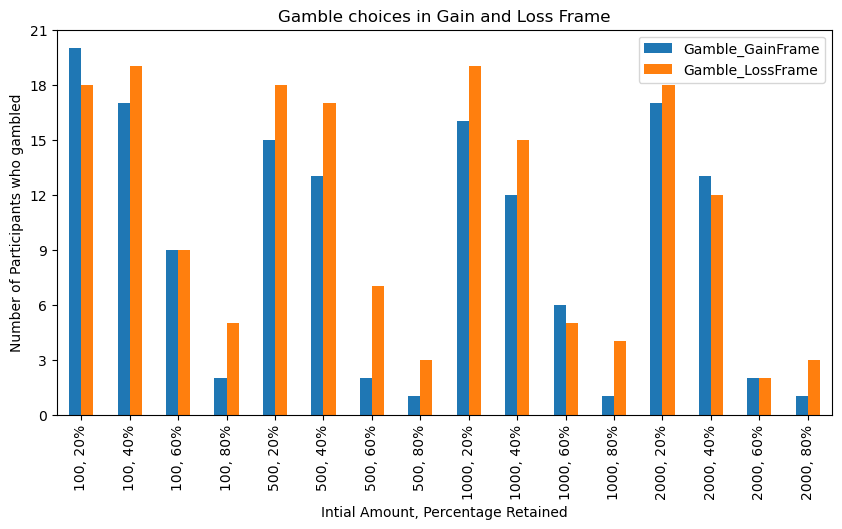

In [212]:
# Plot the bar graph for df_Gamble

df_Gamble.plot(kind='bar', stacked=False, figsize=(10, 5))
plt.title('Gamble choices in Gain and Loss Frame')
plt.xlabel('Intial Amount, Percentage Retained')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Number of Participants who gambled')
plt.legend(loc='upper right')
plt.show()

In [213]:
# save the dataframe to csv file for debugging, delete the file if it already exists
if os.path.exists('Gamble.csv'):
    os.remove('Gamble.csv')

df_Gamble.to_csv('Gamble.csv', index=True)

In [214]:
# Make a new dataframe which is a copy of df_Gamble

df_Gamble_InitAmount = df_Gamble.copy()

# print(df_Gamble_InitAmount)

# Combine the entries for 100, 20%, 100, 40%, 100, 60%, 100, 80% into one entry "100"
df_Gamble_InitAmount.loc['100'] = df_Gamble_InitAmount.loc['100, 20%'] + df_Gamble_InitAmount.loc['100, 40%'] + df_Gamble_InitAmount.loc['100, 60%'] + df_Gamble_InitAmount.loc['100, 80%']

# Combine the entries for 500, 20%, 500, 40%, 500, 60%, 500, 80% into one entry "500"
df_Gamble_InitAmount.loc['500'] = df_Gamble_InitAmount.loc['500, 20%'] + df_Gamble_InitAmount.loc['500, 40%'] + df_Gamble_InitAmount.loc['500, 60%'] + df_Gamble_InitAmount.loc['500, 80%']

# Combine the entries for 1000, 20%, 1000, 40%, 1000, 60%, 1000, 80% into one entry "1000"
df_Gamble_InitAmount.loc['1000'] = df_Gamble_InitAmount.loc['1000, 20%'] + df_Gamble_InitAmount.loc['1000, 40%'] + df_Gamble_InitAmount.loc['1000, 60%'] + df_Gamble_InitAmount.loc['1000, 80%']

# Combine the entries for 2000, 20%, 2000, 40%, 2000, 60%, 2000, 80% into one entry "2000"
df_Gamble_InitAmount.loc['2000'] = df_Gamble_InitAmount.loc['2000, 20%'] + df_Gamble_InitAmount.loc['2000, 40%'] + df_Gamble_InitAmount.loc['2000, 60%'] + df_Gamble_InitAmount.loc['2000, 80%']

# delete the entries "100, 20%", "100, 40%", "100, 60%", "100, 80%", "500, 20%", "500, 40%", "500, 60%", "500, 80%", "1000, 20%", "1000, 40%", "1000, 60%", "1000, 80%", "2000, 20%", "2000, 40%", "2000, 60%", "2000, 80%"
df_Gamble_InitAmount = df_Gamble_InitAmount.drop(['100, 20%', '100, 40%', '100, 60%', '100, 80%', '500, 20%', '500, 40%', '500, 60%', '500, 80%', '1000, 20%', '1000, 40%', '1000, 60%', '1000, 80%', '2000, 20%', '2000, 40%', '2000, 60%', '2000, 80%'])

# print(df_Gamble_InitAmount)

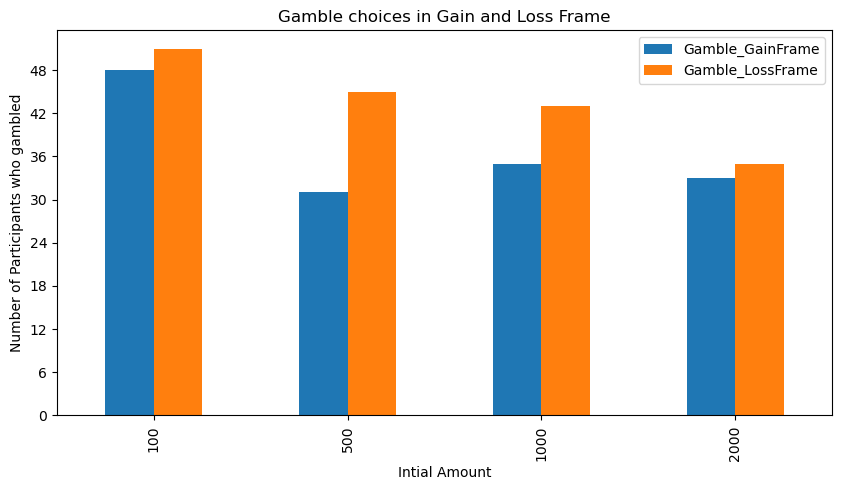

In [215]:
# Plot the bar graph for df_Gamble_InitAmount

df_Gamble_InitAmount.plot(kind='bar', stacked=False, figsize=(10, 5))
plt.title('Gamble choices in Gain and Loss Frame')
plt.xlabel('Intial Amount')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Number of Participants who gambled')
plt.legend(loc='upper right')
plt.show()

In [216]:
# Make a new dataframe which is a copy of df_Gamble

df_Gamble_PercentRetained = df_Gamble.copy()

# print(df_Gamble_PercentRetained)

# Combine the entries for 100, 20%, 500, 20%, 1000, 20%, 2000, 20% into one entry "20%"
df_Gamble_PercentRetained.loc['20%'] = df_Gamble_PercentRetained.loc['100, 20%'] + df_Gamble_PercentRetained.loc['500, 20%'] + df_Gamble_PercentRetained.loc['1000, 20%'] + df_Gamble_PercentRetained.loc['2000, 20%']

# Combine the entries for 100, 40%, 500, 40%, 1000, 40%, 2000, 40% into one entry "40%"
df_Gamble_PercentRetained.loc['40%'] = df_Gamble_PercentRetained.loc['100, 40%'] + df_Gamble_PercentRetained.loc['500, 40%'] + df_Gamble_PercentRetained.loc['1000, 40%'] + df_Gamble_PercentRetained.loc['2000, 40%']

# Combine the entries for 100, 60%, 500, 60%, 1000, 60%, 2000, 60% into one entry "60%"
df_Gamble_PercentRetained.loc['60%'] = df_Gamble_PercentRetained.loc['100, 60%'] + df_Gamble_PercentRetained.loc['500, 60%'] + df_Gamble_PercentRetained.loc['1000, 60%'] + df_Gamble_PercentRetained.loc['2000, 60%']

# Combine the entries for 100, 80%, 500, 80%, 1000, 80%, 2000, 80% into one entry "80%"
df_Gamble_PercentRetained.loc['80%'] = df_Gamble_PercentRetained.loc['100, 80%'] + df_Gamble_PercentRetained.loc['500, 80%'] + df_Gamble_PercentRetained.loc['1000, 80%'] + df_Gamble_PercentRetained.loc['2000, 80%']

# delete the entries "100, 20%", "100, 40%", "100, 60%", "100, 80%", "500, 20%", "500, 40%", "500, 60%", "500, 80%", "1000, 20%", "1000, 40%", "1000, 60%", "1000, 80%", "2000, 20%", "2000, 40%", "2000, 60%", "2000, 80%"
df_Gamble_PercentRetained = df_Gamble_PercentRetained.drop(['100, 20%', '100, 40%', '100, 60%', '100, 80%', '500, 20%', '500, 40%', '500, 60%', '500, 80%', '1000, 20%', '1000, 40%', '1000, 60%', '1000, 80%', '2000, 20%', '2000, 40%', '2000, 60%', '2000, 80%'])

# print(df_Gamble_PercentRetained)

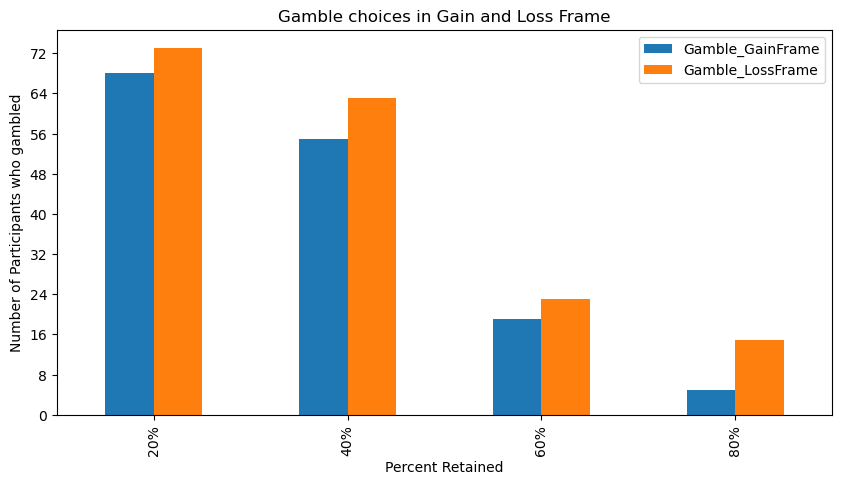

In [217]:
# Plot the bar graph for df_Gamble_PercentRetained

df_Gamble_PercentRetained.plot(kind='bar', stacked=False, figsize=(10, 5))
plt.title('Gamble choices in Gain and Loss Frame')
plt.xlabel('Percent Retained')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Number of Participants who gambled')
plt.legend(loc='upper right')
plt.show()

In [218]:
# Split df_GainFrame into two dataframes on the basis of the column "Gender"

df_GainFrame_Male = df_GainFrame[df_GainFrame['Gender']=='Male']

# print(df_GainFrame_Male)

df_GainFrame_Female = df_GainFrame[df_GainFrame['Gender']=='Female']

# print(df_GainFrame_Female)

# Split df_LossFrame into two dataframes on the basis of the column "Gender"

df_LossFrame_Male = df_LossFrame[df_LossFrame['Gender']=='Male']
df_LossFrame_Female = df_LossFrame[df_LossFrame['Gender']=='Female']

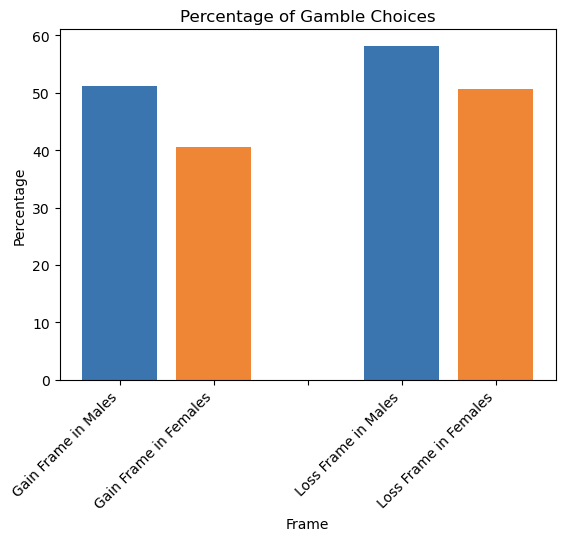

Percentage of Gamble Choices in Gain Frame in Males:  51.24999999999999
Percentage of Gamble Choices in Gain Frame in Females:  40.625
Percentage of Gamble Choices in Loss Frame in Males:  58.12500000000001
Percentage of Gamble Choices in Loss Frame in Females:  50.625


In [219]:
# Total number of "Gamble" choices in df_GainFrame
total_Gamble_GainFrame_Male = df_GainFrame_Male['Gamble'].sum()
total_Gamble_GainFrame_Female = df_GainFrame_Female['Gamble'].sum()

# Total number of "Gamble" choices in df_LossFrame
total_Gamble_LossFrame_Male = df_LossFrame_Male['Gamble'].sum()
total_Gamble_LossFrame_Female = df_LossFrame_Female['Gamble'].sum()

# Total number of "Keep" choices in df_GainFrame
total_Keep_GainFrame_Male = df_GainFrame_Male['Keep'].sum()
total_Keep_GainFrame_Female = df_GainFrame_Female['Keep'].sum()

# Total number of "Loss" choices in df_LossFrame
total_Loss_LossFrame_Male = df_LossFrame_Male['Loss'].sum()
total_Loss_LossFrame_Female = df_LossFrame_Female['Loss'].sum()

# Percentage of "Gamble" choices in df_GainFrame
percentage_Gamble_GainFrame_Male = (total_Gamble_GainFrame_Male / (total_Gamble_GainFrame_Male + total_Keep_GainFrame_Male)) * 100
percentage_Gamble_GainFrame_Female = (total_Gamble_GainFrame_Female / (total_Gamble_GainFrame_Female + total_Keep_GainFrame_Female)) * 100

# Percentage of "Gamble" choices in df_LossFrame
percentage_Gamble_LossFrame_Male = (total_Gamble_LossFrame_Male / (total_Gamble_LossFrame_Male + total_Loss_LossFrame_Male)) * 100
percentage_Gamble_LossFrame_Female = (total_Gamble_LossFrame_Female / (total_Gamble_LossFrame_Female + total_Loss_LossFrame_Female)) * 100

# plot the above percentages as a bar chart
# make the thickness of the bars thinner
# make the gap between the bars smaller
fig, ax = plt.subplots()
plt.bar(['Gain Frame in Males', 'Gain Frame in Females', '','Loss Frame in Males', 'Loss Frame in Females'], [percentage_Gamble_GainFrame_Male, percentage_Gamble_GainFrame_Female, 0, percentage_Gamble_LossFrame_Male, percentage_Gamble_LossFrame_Female], color=['#3b75af', '#ef8636', 'white', '#3b75af', '#ef8636'])

# plt.ylim(0, 100)
plt.title('Percentage of Gamble Choices')
plt.xlabel('Frame')
plt.ylabel('Percentage')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

# print the above percentages
print('Percentage of Gamble Choices in Gain Frame in Males: ', percentage_Gamble_GainFrame_Male)
print('Percentage of Gamble Choices in Gain Frame in Females: ', percentage_Gamble_GainFrame_Female)
print('Percentage of Gamble Choices in Loss Frame in Males: ', percentage_Gamble_LossFrame_Male)
print('Percentage of Gamble Choices in Loss Frame in Females: ', percentage_Gamble_LossFrame_Female)

In [220]:
# print(df_GainFrame)

# Calculate total starting time from the "Response started" and "Response completed" columns

# Convert the "Response started" and "Response completed" columns to datetime format

df_GainFrame['Response started'] = pd.to_datetime(df_GainFrame['Response started'])
# print(df_GainFrame['Response started'])

df_GainFrame['Response completed'] = pd.to_datetime(df_GainFrame['Response completed'])
# print(df_GainFrame['Response completed'])

# Calculate the difference between the "Response started" and "Response completed" columns

df_GainFrame['Time Taken'] = df_GainFrame['Response completed'] - df_GainFrame['Response started']
# print(df_GainFrame['Time Taken'])

# Convert the "Time Taken" column to seconds

df_GainFrame['Time Taken'] = df_GainFrame['Time Taken'].dt.total_seconds()
# print(df_GainFrame['Time Taken'])

# Divide each value in the "Time Taken" column by 16 to convert it into "Average Response Time"

df_GainFrame['Time Taken'] = df_GainFrame['Time Taken'] / 16

# Rename the "Time Taken" column to "Average Response Time"

df_GainFrame.rename(columns={'Time Taken': 'Average Response Time'}, inplace=True)

# Print the 'Average Response Time' column

# print(df_GainFrame['Average Response Time'])

In [221]:
# Repeat the above steps for df_LossFrame

df_LossFrame['Response started'] = pd.to_datetime(df_LossFrame['Response started'])
df_LossFrame['Response completed'] = pd.to_datetime(df_LossFrame['Response completed'])

df_LossFrame['Time Taken'] = df_LossFrame['Response completed'] - df_LossFrame['Response started']

df_LossFrame['Time Taken'] = df_LossFrame['Time Taken'].dt.total_seconds()

df_LossFrame['Time Taken'] = df_LossFrame['Time Taken'] / 16

df_LossFrame.rename(columns={'Time Taken': 'Average Response Time'}, inplace=True)

# print(df_LossFrame['Average Response Time'])

C:\Users\pranj\AppData\Local\Temp\ipykernel_24236\962207212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AvgResponseTime_GainFrame['Participant Index'] = df_AvgResponseTime_GainFrame.index


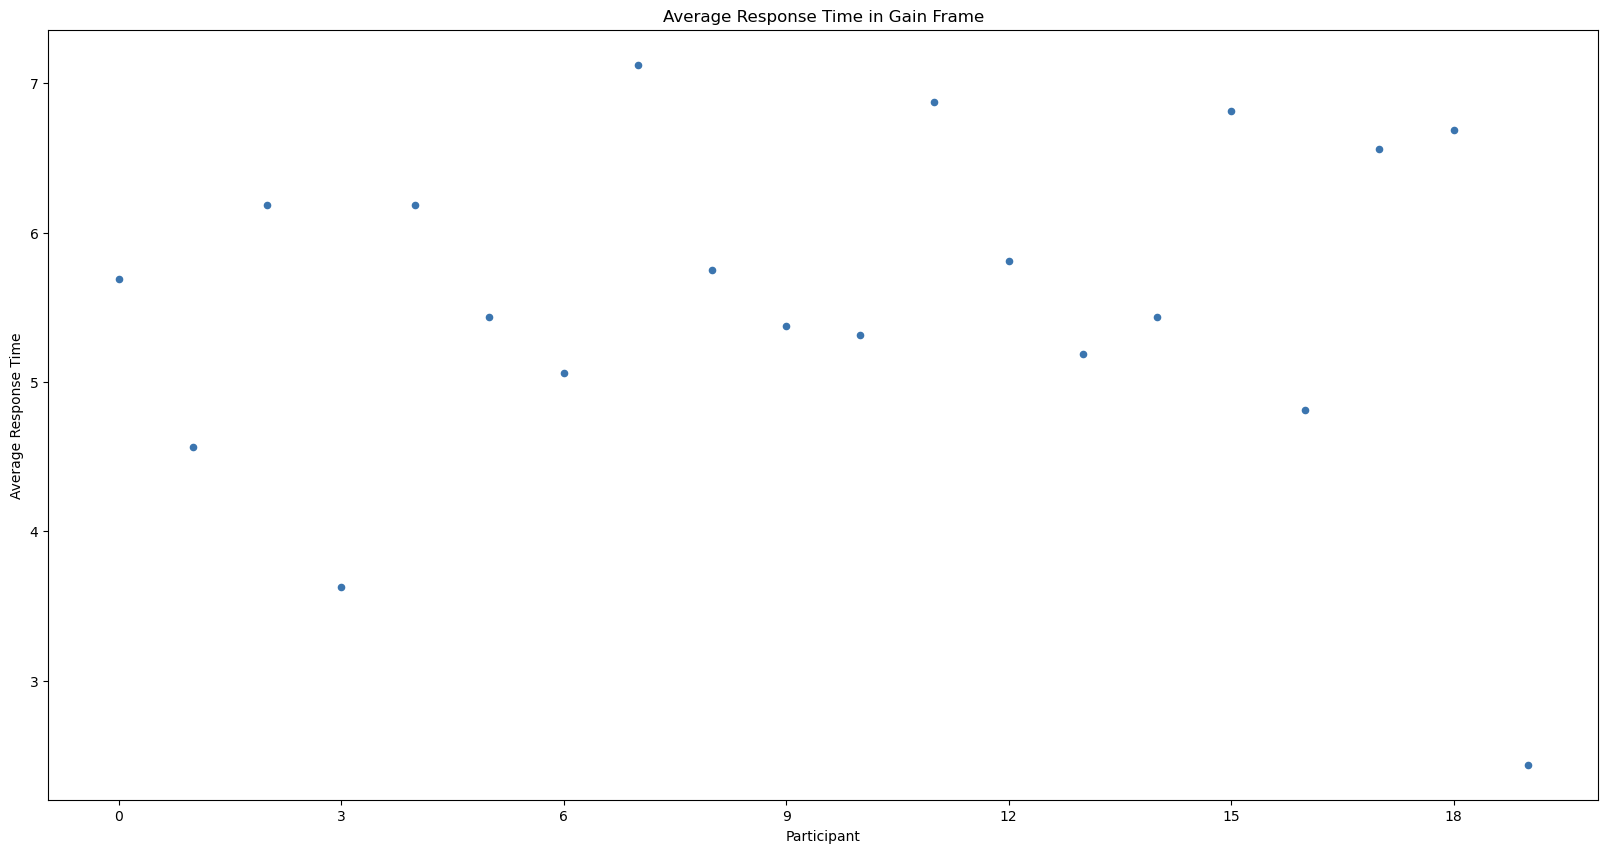

C:\Users\pranj\AppData\Local\Temp\ipykernel_24236\962207212.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AvgResponseTime_LossFrame['Participant Index'] = df_AvgResponseTime_LossFrame.index


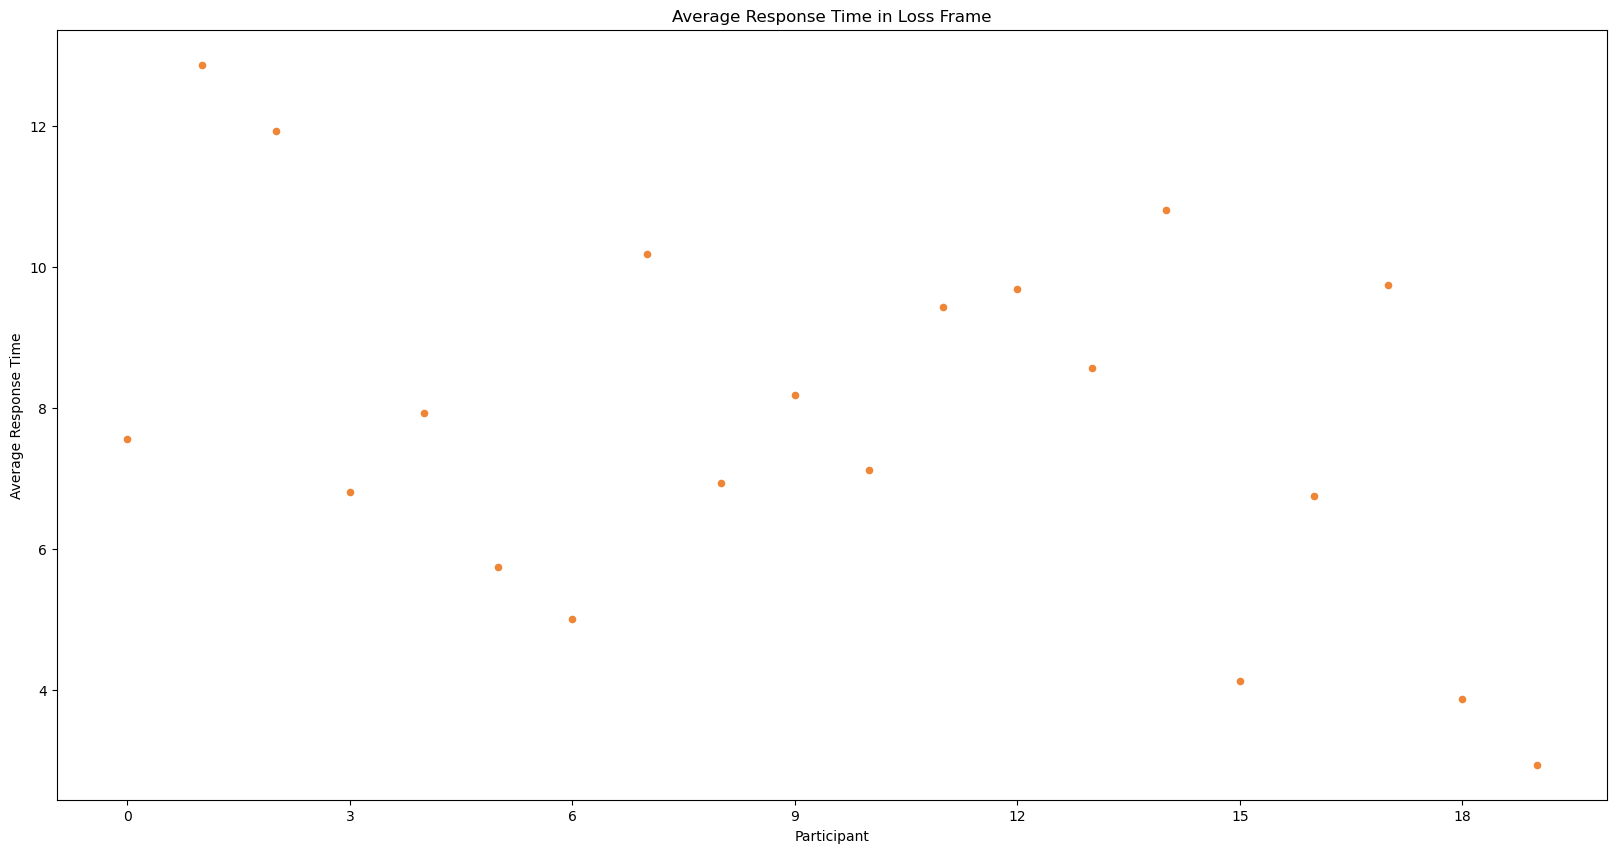

In [222]:
# Plot bar plot of "Average Response Time" for all the participants in df_GainFrame

df_AvgResponseTime_GainFrame = df_GainFrame[['Average Response Time']]
# print(df_AvgResponseTime_GainFrame)

# Add a participant index column to df_AvgResponseTime_GainFrame

df_AvgResponseTime_GainFrame['Participant Index'] = df_AvgResponseTime_GainFrame.index
# print(df_AvgResponseTime_GainFrame)

# df_AvgResponseTime_GainFrame.plot.bar(x='Participant Index', y='Average Response Time', rot=0, figsize=(20, 10), color='#3b75af')

# plt.title('Average Response Time in Gain Frame')
# plt.xlabel('Participant')
# plt.ylabel('Average Response Time')
# plt.show()

# Plot scatter plot of "Average Response Time" for all the participants in df_GainFrame

# df_AvgResponseTime_GainFrame.plot(kind='scatter', figsize=(20, 10), color='#3b75af')
df_AvgResponseTime_GainFrame.plot.scatter(x='Participant Index', y='Average Response Time', figsize=(20, 10), color='#3b75af')

plt.title('Average Response Time in Gain Frame')
plt.xlabel('Participant')
plt.ylabel('Average Response Time')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Plot bar plot of "Average Response Time" for all the participants in df_LossFrame

df_AvgResponseTime_LossFrame = df_LossFrame[['Average Response Time']]
# print(df_AvgResponseTime_LossFrame)

# Add a participant index column to df_AvgResponseTime_LossFrame

df_AvgResponseTime_LossFrame['Participant Index'] = df_AvgResponseTime_LossFrame.index

# df_AvgResponseTime_LossFrame.plot.bar(x='Participant Index', y='Average Response Time', rot=0, figsize=(20, 10), color='#ef8636')

# plt.title('Average Response Time in Loss Frame')
# plt.xlabel('Participant')
# plt.ylabel('Average Response Time')
# plt.show()

# Plot scatter plot of "Average Response Time" for all the participants in df_LossFrame

# df_AvgResponseTime_LossFrame.plot(kind='scatter', figsize=(20, 10), color='#ef8636')
df_AvgResponseTime_LossFrame.plot.scatter(x='Participant Index', y='Average Response Time', figsize=(20, 10), color='#ef8636')

plt.title('Average Response Time in Loss Frame')
plt.xlabel('Participant')
plt.ylabel('Average Response Time')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [223]:
# Plot the above scatter plots together in one plot

# Add the df_AvgResponseTime_GainFrame and df_AvgResponseTime_LossFrame dataframes together

df_AvgResponseTime_LossFrame['Participant Index'] = df_AvgResponseTime_LossFrame['Participant Index'] + 20
print(df_AvgResponseTime_LossFrame)

    Average Response Time  Participant Index
0                  7.5625                 20
1                 12.8750                 21
2                 11.9375                 22
3                  6.8125                 23
4                  7.9375                 24
5                  5.7500                 25
6                  5.0000                 26
7                 10.1875                 27
8                  6.9375                 28
9                  8.1875                 29
10                 7.1250                 30
11                 9.4375                 31
12                 9.6875                 32
13                 8.5625                 33
14                10.8125                 34
15                 4.1250                 35
16                 6.7500                 36
17                 9.7500                 37
18                 3.8750                 38
19                 2.9375                 39


C:\Users\pranj\AppData\Local\Temp\ipykernel_24236\4180069910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AvgResponseTime_LossFrame['Participant Index'] = df_AvgResponseTime_LossFrame['Participant Index'] + 20


In [224]:
# Add 'Color' column to df_AvgResponseTime_GainFrame and df_AvgResponseTime_LossFrame

df_AvgResponseTime_GainFrame['Color'] = '#3b75af'
df_AvgResponseTime_LossFrame['Color'] = '#ef8636'

C:\Users\pranj\AppData\Local\Temp\ipykernel_24236\641755844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AvgResponseTime_GainFrame['Color'] = '#3b75af'
C:\Users\pranj\AppData\Local\Temp\ipykernel_24236\641755844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AvgResponseTime_LossFrame['Color'] = '#ef8636'


C:\Users\pranj\AppData\Local\Temp\ipykernel_24236\3723298749.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_AvgResponseTime = df_AvgResponseTime.append(df_AvgResponseTime_LossFrame, ignore_index=True)


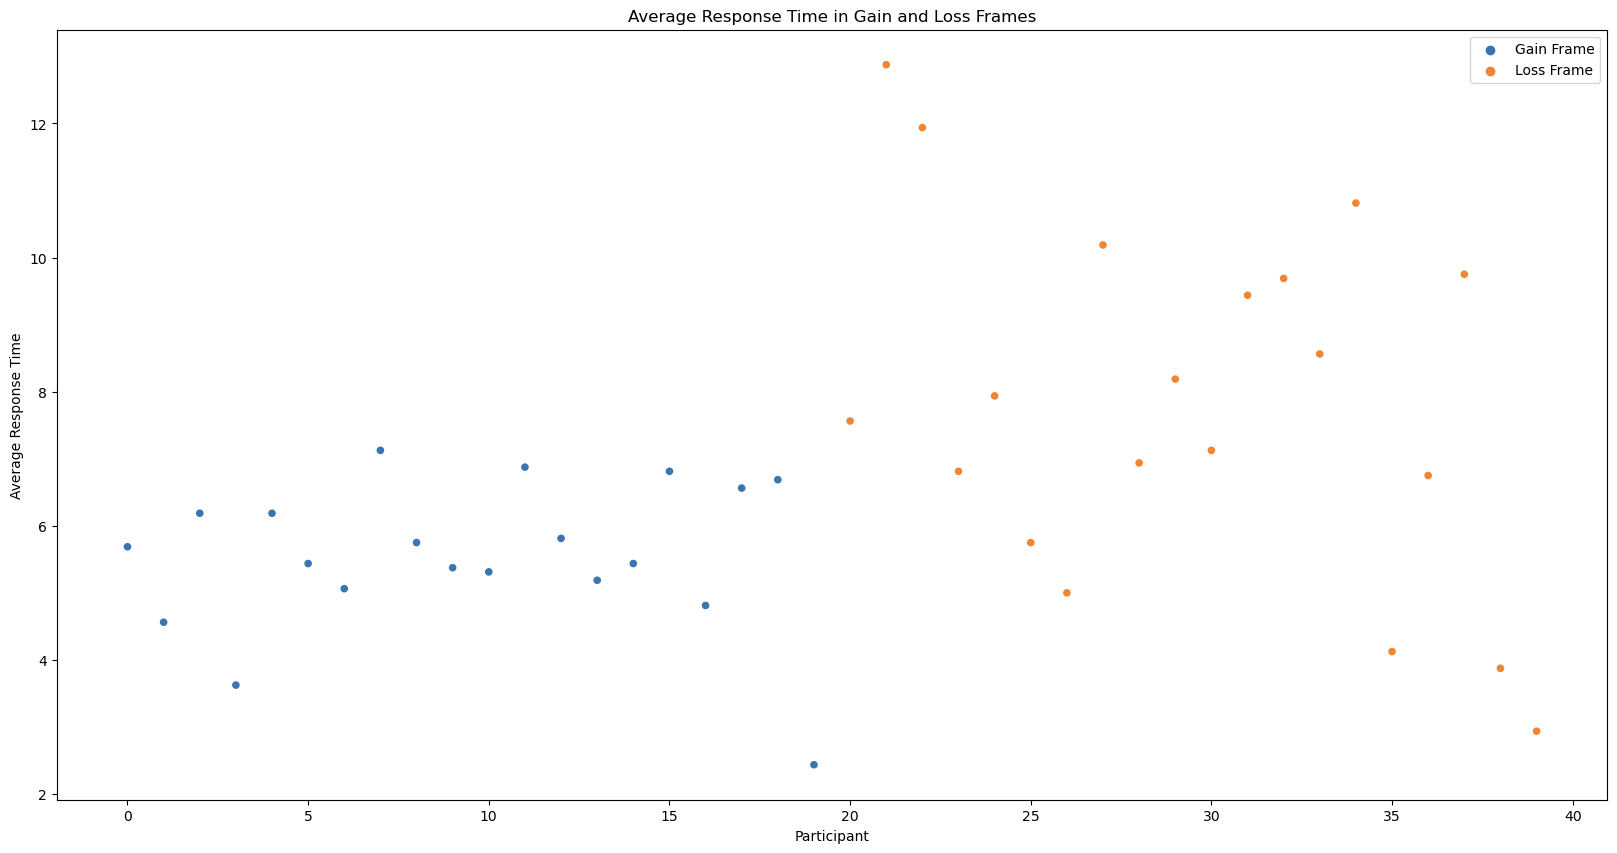

In [225]:
# Make copy of df_AvgResponseTime_GainFrame

df_AvgResponseTime = df_AvgResponseTime_GainFrame.copy()

# Append df_AvgResponseTime_LossFrame to df_AvgResponseTime

df_AvgResponseTime = df_AvgResponseTime.append(df_AvgResponseTime_LossFrame, ignore_index=True)
# print(df_AvgResponseTime)

df_AvgResponseTime.plot.scatter(x='Participant Index', y='Average Response Time', figsize=(20, 10), c='Color')

plt.title('Average Response Time in Gain and Loss Frames')
plt.xlabel('Participant')
plt.ylabel('Average Response Time')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Add a legend according to the color

plt.scatter([], [], c='#3b75af', label='Gain Frame')
plt.scatter([], [], c='#ef8636', label='Loss Frame')

plt.legend()

plt.show()
    

In [226]:
# Print the average response time for each frame

print('Average Response Time in Gain Frame: ', df_AvgResponseTime_GainFrame['Average Response Time'].mean())
print('Average Response Time in Loss Frame: ', df_AvgResponseTime_LossFrame['Average Response Time'].mean())

# Print overall average response time

print('Overall Average Response Time: ', df_AvgResponseTime['Average Response Time'].mean())

# Print the variance of the response time for each frame

print('Variance of Response Time in Gain Frame: ', df_AvgResponseTime_GainFrame['Average Response Time'].var())
print('Variance of Response Time in Loss Frame: ', df_AvgResponseTime_LossFrame['Average Response Time'].var())

# Print overall variance of the response time

print('Overall Variance of Response Time: ', df_AvgResponseTime['Average Response Time'].var())

# Print the standard deviation of the response time for each frame

print('Standard Deviation of Response Time in Gain Frame: ', df_AvgResponseTime_GainFrame['Average Response Time'].std())
print('Standard Deviation of Response Time in Loss Frame: ', df_AvgResponseTime_LossFrame['Average Response Time'].std())

# Print overall standard deviation of the response time

print('Overall Standard Deviation of Response Time: ', df_AvgResponseTime['Average Response Time'].std())

# Print the standard deviation and variance as percentages of the mean

print('Standard Deviation of Response Time in Gain Frame as a Percentage of the Mean: ', df_AvgResponseTime_GainFrame['Average Response Time'].std() / df_AvgResponseTime_GainFrame['Average Response Time'].mean() * 100)
print('Standard Deviation of Response Time in Loss Frame as a Percentage of the Mean: ', df_AvgResponseTime_LossFrame['Average Response Time'].std() / df_AvgResponseTime_LossFrame['Average Response Time'].mean() * 100)

print('Variance of Response Time in Gain Frame as a Percentage of the Mean: ', df_AvgResponseTime_GainFrame['Average Response Time'].var() / df_AvgResponseTime_GainFrame['Average Response Time'].mean() * 100)
print('Variance of Response Time in Loss Frame as a Percentage of the Mean: ', df_AvgResponseTime_LossFrame['Average Response Time'].var() / df_AvgResponseTime_LossFrame['Average Response Time'].mean() * 100)

# Print overall standard deviation and variance as percentages of the mean

print('Standard Deviation of Response Time as a Percentage of the Mean: ', df_AvgResponseTime['Average Response Time'].std() / df_AvgResponseTime['Average Response Time'].mean() * 100)
print('Variance of Response Time as a Percentage of the Mean: ', df_AvgResponseTime['Average Response Time'].var() / df_AvgResponseTime['Average Response Time'].mean() * 100)

Average Response Time in Gain Frame:  5.546875
Average Response Time in Loss Frame:  7.8125
Overall Average Response Time:  6.6796875
Variance of Response Time in Gain Frame:  1.288599917763158
Variance of Response Time in Loss Frame:  7.177631578947368
Overall Variance of Response Time:  5.440742688301282
Standard Deviation of Response Time in Gain Frame:  1.1351651499949944
Standard Deviation of Response Time in Loss Frame:  2.6791102215002964
Overall Standard Deviation of Response Time:  2.3325399649955156
Standard Deviation of Response Time in Gain Frame as a Percentage of the Mean:  20.46494918300835
Standard Deviation of Response Time in Loss Frame as a Percentage of the Mean:  34.292610835203796
Variance of Response Time in Gain Frame as a Percentage of the Mean:  23.23109710896961
Variance of Response Time in Loss Frame as a Percentage of the Mean:  91.8736842105263
Standard Deviation of Response Time as a Percentage of the Mean:  34.919896551979654
Variance of Response Time as

In [227]:
# # Remove outliers using IQR

# # Calculate the first and third quartiles

# q1 = df_AvgResponseTime['Average Response Time'].quantile(0.25)
# q3 = df_AvgResponseTime['Average Response Time'].quantile(0.75)

# # Calculate the interquartile range

# iqr = q3 - q1

# # Calculate the lower and upper bounds

# lower_bound = q1 - (1.5 * iqr)
# upper_bound = q3 + (1.5 * iqr)

# # Remove outliers

# df_AvgResponseTime = df_AvgResponseTime[(df_AvgResponseTime['Average Response Time'] > lower_bound) & (df_AvgResponseTime['Average Response Time'] < upper_bound)]

# # Plot the above scatter plots together in one plot

# df_AvgResponseTime.plot.scatter(x='Participant Index', y='Average Response Time', figsize=(20, 10), c='Color')

# plt.title('Average Response Time in Gain and Loss Frames')
# plt.xlabel('Participant')
# plt.ylabel('Average Response Time')
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# # Add a legend according to the color

# plt.scatter([], [], c='#3b75af', label='Gain Frame')
# plt.scatter([], [], c='#ef8636', label='Loss Frame')

# plt.legend()

# plt.show()

In [228]:
# Remove outliers using IQR for Gain Frame

# Calculate the first and third quartiles for Gain Frame

q1 = df_AvgResponseTime_GainFrame['Average Response Time'].quantile(0.25)
q3 = df_AvgResponseTime_GainFrame['Average Response Time'].quantile(0.75)

# Calculate the interquartile range for Gain Frame

iqr = q3 - q1

# Calculate the lower and upper bounds for Gain Frame

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Remove outliers for Gain Frame

df_AvgResponseTime_GainFrame = df_AvgResponseTime_GainFrame[(df_AvgResponseTime_GainFrame['Average Response Time'] > lower_bound) & (df_AvgResponseTime_GainFrame['Average Response Time'] < upper_bound)]


In [229]:
# Remove outliers using IQR for Loss Frame

# Calculate the first and third quartiles for Loss Frame

q1 = df_AvgResponseTime_LossFrame['Average Response Time'].quantile(0.25)
q3 = df_AvgResponseTime_LossFrame['Average Response Time'].quantile(0.75)

# Calculate the interquartile range for Loss Frame

iqr = q3 - q1

# Calculate the lower and upper bounds for Loss Frame

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Remove outliers for Loss Frame

df_AvgResponseTime_LossFrame = df_AvgResponseTime_LossFrame[(df_AvgResponseTime_LossFrame['Average Response Time'] > lower_bound) & (df_AvgResponseTime_LossFrame['Average Response Time'] < upper_bound)]

In [230]:
print(df_AvgResponseTime_GainFrame.shape)
print(df_AvgResponseTime_LossFrame.shape)

# print(df_AvgResponseTime_GainFrame)
# print(df_AvgResponseTime_LossFrame)

df_AvgResponseTime_LossFrame['Participant Index'] = df_AvgResponseTime_LossFrame['Participant Index'] - 1

print(df_AvgResponseTime_GainFrame)
print(df_AvgResponseTime_LossFrame)

(19, 3)
(20, 3)
    Average Response Time  Participant Index    Color
0                  5.6875                  0  #3b75af
1                  4.5625                  1  #3b75af
2                  6.1875                  2  #3b75af
3                  3.6250                  3  #3b75af
4                  6.1875                  4  #3b75af
5                  5.4375                  5  #3b75af
6                  5.0625                  6  #3b75af
7                  7.1250                  7  #3b75af
8                  5.7500                  8  #3b75af
9                  5.3750                  9  #3b75af
10                 5.3125                 10  #3b75af
11                 6.8750                 11  #3b75af
12                 5.8125                 12  #3b75af
13                 5.1875                 13  #3b75af
14                 5.4375                 14  #3b75af
15                 6.8125                 15  #3b75af
16                 4.8125                 16  #3b75af
17          

C:\Users\pranj\AppData\Local\Temp\ipykernel_24236\3723298749.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_AvgResponseTime = df_AvgResponseTime.append(df_AvgResponseTime_LossFrame, ignore_index=True)


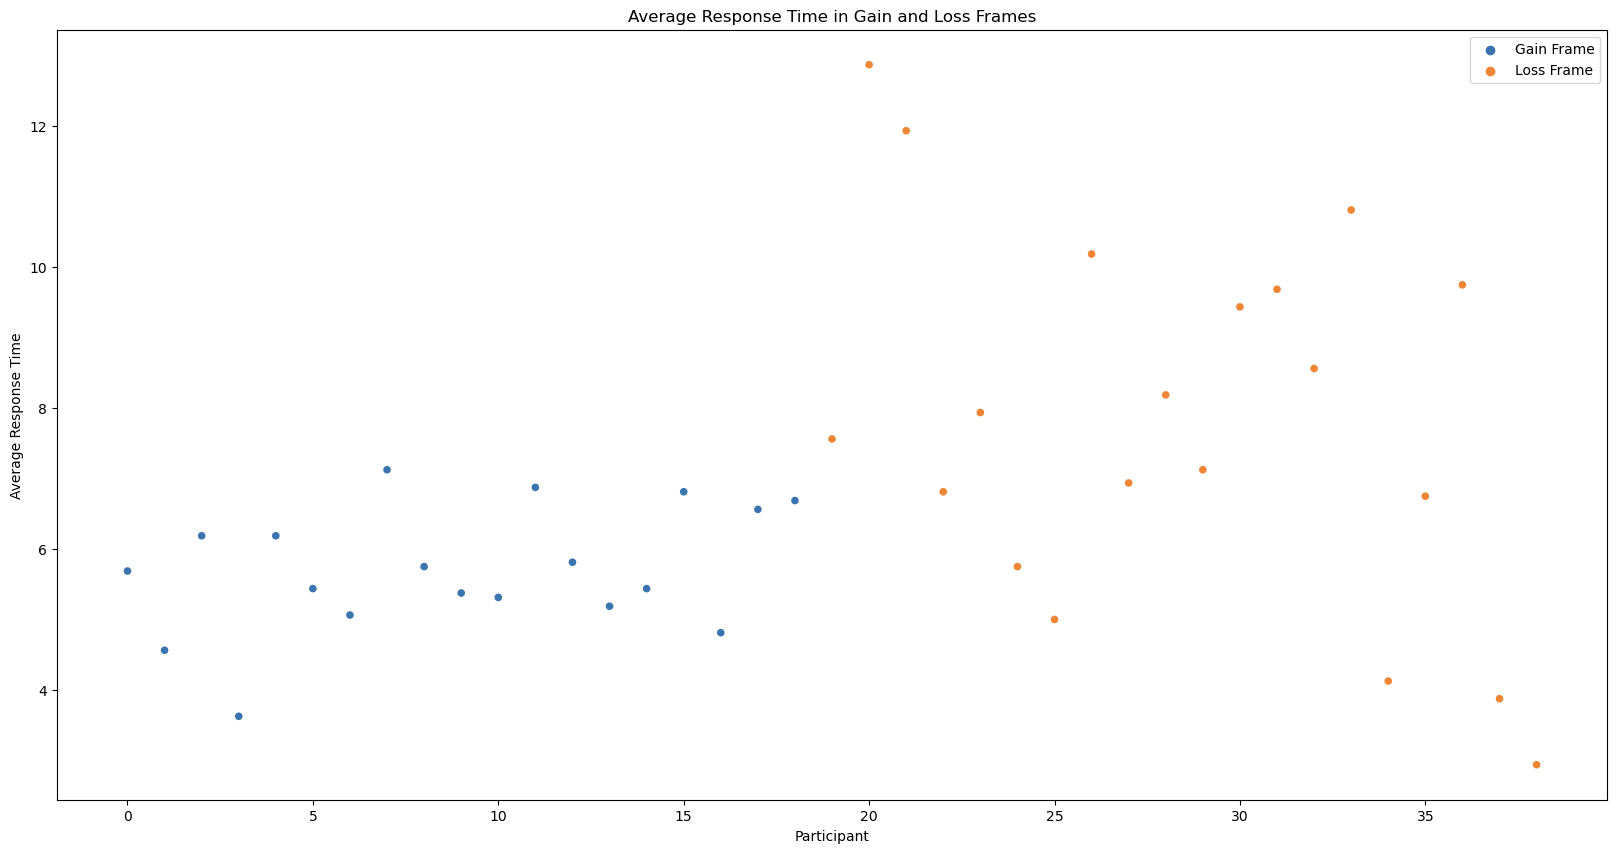

In [231]:
# Make copy of df_AvgResponseTime_GainFrame

df_AvgResponseTime = df_AvgResponseTime_GainFrame.copy()

# Append df_AvgResponseTime_LossFrame to df_AvgResponseTime

df_AvgResponseTime = df_AvgResponseTime.append(df_AvgResponseTime_LossFrame, ignore_index=True)
# print(df_AvgResponseTime)

df_AvgResponseTime.plot.scatter(x='Participant Index', y='Average Response Time', figsize=(20, 10), c='Color')

plt.title('Average Response Time in Gain and Loss Frames')
plt.xlabel('Participant')
plt.ylabel('Average Response Time')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Add a legend according to the color

plt.scatter([], [], c='#3b75af', label='Gain Frame')
plt.scatter([], [], c='#ef8636', label='Loss Frame')

plt.legend()

plt.show()
    

In [232]:
print(df_AvgResponseTime.shape)

(39, 3)


In [236]:
# Print the average response time for each frame upto 2 decimal places

print('Average Response Time in Gain Frame: ', round(df_AvgResponseTime_GainFrame['Average Response Time'].mean(), 2))
print('Average Response Time in Loss Frame: ', round(df_AvgResponseTime_LossFrame['Average Response Time'].mean(), 2))

# print('Average Response Time in Gain Frame: ', df_AvgResponseTime_GainFrame['Average Response Time'].mean())
# print('Average Response Time in Loss Frame: ', df_AvgResponseTime_LossFrame['Average Response Time'].mean())

# Print overall average response time upto 2 decimal places

print('Overall Average Response Time: ', round(df_AvgResponseTime['Average Response Time'].mean(), 2))

# print('Overall Average Response Time: ', df_AvgResponseTime['Average Response Time'].mean())

# Print the variance of the response time for each frame upto 2 decimal places

print('Variance of Response Time in Gain Frame: ', round(df_AvgResponseTime_GainFrame['Average Response Time'].var(), 2))
print('Variance of Response Time in Loss Frame: ', round(df_AvgResponseTime_LossFrame['Average Response Time'].var(), 2))

# print('Variance of Response Time in Gain Frame: ', df_AvgResponseTime_GainFrame['Average Response Time'].var())
# print('Variance of Response Time in Loss Frame: ', df_AvgResponseTime_LossFrame['Average Response Time'].var())

# Print overall variance of the response time

# print('Overall Variance of Response Time: ', df_AvgResponseTime['Average Response Time'].var())

# Print the standard deviation of the response time for each frame upto 2 decimal places

print('Standard Deviation of Response Time in Gain Frame: ', round(df_AvgResponseTime_GainFrame['Average Response Time'].std(), 2))
print('Standard Deviation of Response Time in Loss Frame: ', round(df_AvgResponseTime_LossFrame['Average Response Time'].std(), 2))

# print('Standard Deviation of Response Time in Gain Frame: ', df_AvgResponseTime_GainFrame['Average Response Time'].std())
# print('Standard Deviation of Response Time in Loss Frame: ', df_AvgResponseTime_LossFrame['Average Response Time'].std())

# Print overall standard deviation of the response time

# print('Overall Standard Deviation of Response Time: ', df_AvgResponseTime['Average Response Time'].std())

# Print the standard deviation and variance as percentages of the mean

# print('Standard Deviation of Response Time in Gain Frame as a Percentage of the Mean: ', df_AvgResponseTime_GainFrame['Average Response Time'].std() / df_AvgResponseTime_GainFrame['Average Response Time'].mean() * 100)
# print('Standard Deviation of Response Time in Loss Frame as a Percentage of the Mean: ', df_AvgResponseTime_LossFrame['Average Response Time'].std() / df_AvgResponseTime_LossFrame['Average Response Time'].mean() * 100)

# print('Variance of Response Time in Gain Frame as a Percentage of the Mean: ', df_AvgResponseTime_GainFrame['Average Response Time'].var() / df_AvgResponseTime_GainFrame['Average Response Time'].mean() * 100)
# print('Variance of Response Time in Loss Frame as a Percentage of the Mean: ', df_AvgResponseTime_LossFrame['Average Response Time'].var() / df_AvgResponseTime_LossFrame['Average Response Time'].mean() * 100)

# Print overall standard deviation and variance as percentages of the mean

# print('Standard Deviation of Response Time as a Percentage of the Mean: ', df_AvgResponseTime['Average Response Time'].std() / df_AvgResponseTime['Average Response Time'].mean() * 100)
# print('Variance of Response Time as a Percentage of the Mean: ', df_AvgResponseTime['Average Response Time'].var() / df_AvgResponseTime['Average Response Time'].mean() * 100)

Average Response Time in Gain Frame:  5.71
Average Response Time in Loss Frame:  7.81
Overall Average Response Time:  6.79
Variance of Response Time in Gain Frame:  0.79
Variance of Response Time in Loss Frame:  7.18
Standard Deviation of Response Time in Gain Frame:  0.89
Standard Deviation of Response Time in Loss Frame:  2.68
